<h1 style='color: green; font-size: 30px; font-weight: bold;'>Trabalho de Conclusão de Curso - Analise Exploratória</h1>
<p style='font-size: 18px; line-height: 2'>Anderson Vasconcelos</p>

# <font color='red' style='font-size: 30px;'>Criação dos modelos de machine learning</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

https://pandas.pydata.org/

https://numpy.org/doc/stable/

https://matplotlib.org/

https://seaborn.pydata.org/api.html

https://scikit-learn.org/stable/

https://www.scikit-yb.org/en/latest/

https://www.scipy.org/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
from sklearn.model_selection import train_test_split
from sklearn import metrics
from yellowbrick.model_selection import FeatureImportances
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;} </style>"))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## O Dataset
<hr>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>area</b> - Área do imóvel (m²)</li>
    <li><b>bedrooms</b> - Quantidade de quartos</li>
    <li><b>contractType</b> - Tipo do contrato</li>
    <li><b>currentPhase</b> - Fase atual </li>
    <li><b>floor</b> - Andar do imóvel</li>
    <li><b>isMarketplace</b> - Se é mercado</li>
    <li><b>parkingSpots</b> - Quantidade de vagas</li>
    <li><b>price</b> - Preço de venda do imóvel (R$)</li>
    <li><b>productType</b> - Tipo de produto</li>
    <li><b>status</b> - Status do imóvel</li>
    <li><b>subwayShortestDistance</b> - Distância mais curta do metrô (m)</li>
    <li><b>suits</b> - Quantidade de suits</li>
    <li><b>towerHasElevator</b> - Se tem elevador</li>
    <li><b>lat</b> - Latitude do imóvel</li>
    <li><b>lng</b> - Longitude do imóvel</li>
    <li><b>streetType</b> - Tipo de rua</li>
    <li><b>neighborhood</b> - Vizinhança (Bairro)</li>
    <li><b>taxRobberyMurder</b> - Taxa de Latrocínios no Bairro no ano de 2020</li>
</ul>

## Leitura dos dados

In [2]:
imoveis = pd.read_csv("dados/dataset_imoveis_loft_sao_paulo_23122020_135200_treated.csv", sep='|')

## Visualizando os dados

In [3]:
imoveis.head()

,area,bedrooms,contractType,currentPhase,floor,isMarketplace,parkingSpots,price,productType,status,subwayShortestDistance,suits,towerHasElevator,lat,lng,streetType,neighborhood,taxRobberyMurder
0,204,3,exclusive,ready_to_move,11,1,2,1800000.0,market,FOR_SALE,731.276,1,0,-23.600530,-46.668488,Avenida,Moema passaros,0.00
1,142,2,exclusive,set_up,7,0,2,1720000.0,select,FOR_SALE,820.737,2,0,-23.534110,-46.664054,Rua,Perdizes,0.00
2,72,3,exclusive,set_up,9,0,1,795000.0,select,FOR_SALE,2447.620,0,1,-23.643561,-46.671709,Rua,Campo belo,0.00
3,70,2,exclusive,ready_to_move,1,1,1,480000.0,market,FOR_SALE,583.255,1,1,-23.535245,-46.575463,Rua,Tatuape,2.27
4,41,1,exclusive,set_up,9,0,1,785000.0,select,FOR_SALE,516.081,0,1,-23.564177,-46.643117,Rua,Bela vista,0.00


## Transformação logarítmica

In [4]:
imoveis['area_log'] = np.log(imoveis.area)
imoveis['price_log'] = np.log(imoveis.price)

In [5]:
imoveis.head()

,area,bedrooms,contractType,currentPhase,floor,isMarketplace,parkingSpots,price,productType,status,subwayShortestDistance,suits,towerHasElevator,lat,lng,streetType,neighborhood,taxRobberyMurder,area_log,price_log
0,204,3,exclusive,ready_to_move,11,1,2,1800000.0,market,FOR_SALE,731.276,1,0,-23.600530,-46.668488,Avenida,Moema passaros,0.00,5.318120,14.403297
1,142,2,exclusive,set_up,7,0,2,1720000.0,select,FOR_SALE,820.737,2,0,-23.534110,-46.664054,Rua,Perdizes,0.00,4.955827,14.357835
2,72,3,exclusive,set_up,9,0,1,795000.0,select,FOR_SALE,2447.620,0,1,-23.643561,-46.671709,Rua,Campo belo,0.00,4.276666,13.586097
3,70,2,exclusive,ready_to_move,1,1,1,480000.0,market,FOR_SALE,583.255,1,1,-23.535245,-46.575463,Rua,Tatuape,2.27,4.248495,13.081541
4,41,1,exclusive,set_up,9,0,1,785000.0,select,FOR_SALE,516.081,0,1,-23.564177,-46.643117,Rua,Bela vista,0.00,3.713572,13.573439


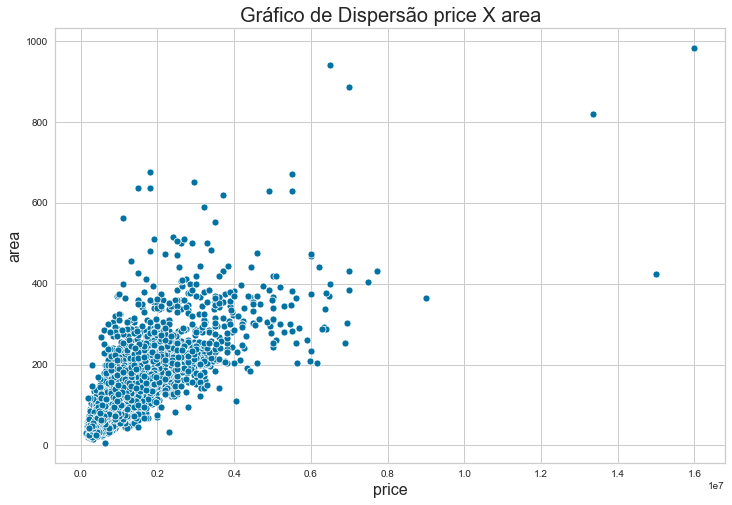

In [6]:
ax = sns.scatterplot(data=imoveis, x="price", y="area")
ax.figure.set_size_inches(12, 8)
ax.set_title('Gráfico de Dispersão price X area', fontsize=20)
ax.set_ylabel('area', fontsize=16)
ax.set_xlabel('price', fontsize=16)
ax

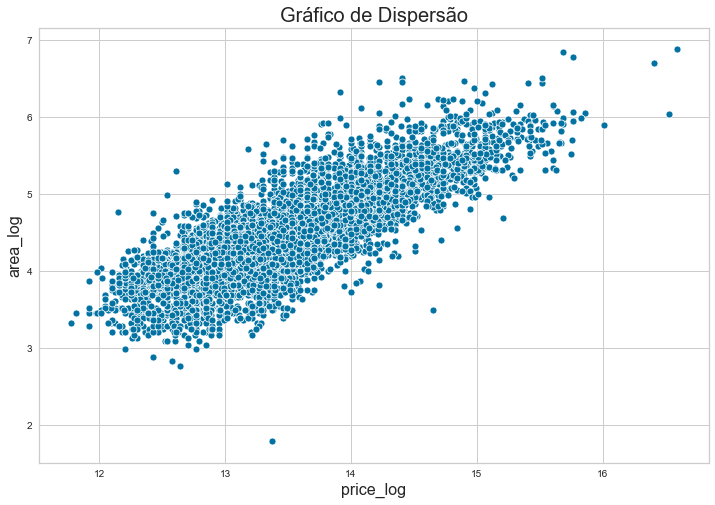

In [7]:
ax = sns.scatterplot(data=imoveis, x="price_log", y="area_log")
ax.figure.set_size_inches(12, 8)
ax.set_title('Gráfico de Dispersão', fontsize=20)
ax.set_ylabel('area_log', fontsize=16)
ax.set_xlabel('price_log', fontsize=16)
ax

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
A aplicação da transformação logarítmica nos campos price e area reduziu o efeito do viés (ou seja, os imóveis com alto valores).</p>

## Separação das variáveis

In [8]:
x = imoveis[['area_log', 'parkingSpots', 'suits', 'bedrooms', 'floor', 'towerHasElevator', 'taxRobberyMurder', 'subwayShortestDistance', 'isMarketplace']]
y = imoveis.price_log

## Separação do dataset de treino e teste

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5478)

## Métricas Para Avaliar Modelos de Regressão

Nesse projeto serão utilizadas as seguintes métricas:

* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)
* Mean Absolute Error (MAE)
* R Squared (R²)
* Adjusted R Squared (R²): R-quadrado ou coeficiente de determinação é uma medida estatística que demonstra o quão próximos os dados estão da linha de regressão ajustada.

In [10]:
def r2_adjusted_score(r2, y_test, x_test):
    n = len(y_test)
    k = len(x_test.columns)
    return (r2 - ((k-1)/(n-k)) * (1-r2))

## Teste dos Modelos
<hr>
Foram utilizados os seguintes modelos nesse projeto:

* LinearRegression
* Ridge
* Lasso
* ElasticNet
* KNeighborsRegressor
* DecisionTreeRegressor
* SVR
* GradientBoostingRegressor
* RandomForestRegressor

## LinearRegression

In [11]:
modelo = LinearRegression()

modelo.fit(x_train, y_train)

y_pred = modelo.predict(x_test).round(2)

mae = metrics.mean_absolute_error(y_test, y_pred).round(4)
mse = metrics.mean_squared_error(y_test, y_pred).round(4)
r2 = metrics.r2_score(y_test, y_pred).round(4)
r2_adjusted = r2_adjusted_score(r2, y_test, x_test).round(4)
rmse = np.sqrt(mse).round(4)

modelo_metricas = pd.DataFrame([{'Modelo': 'LinearRegression','MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2, 'R² Adjusted': r2_adjusted}])

In [12]:
modelo_metricas

,Modelo,MAE,MSE,RMSE,R²,R² Adjusted
0,LinearRegression,0.2457,0.0962,0.3102,0.7951,0.7944


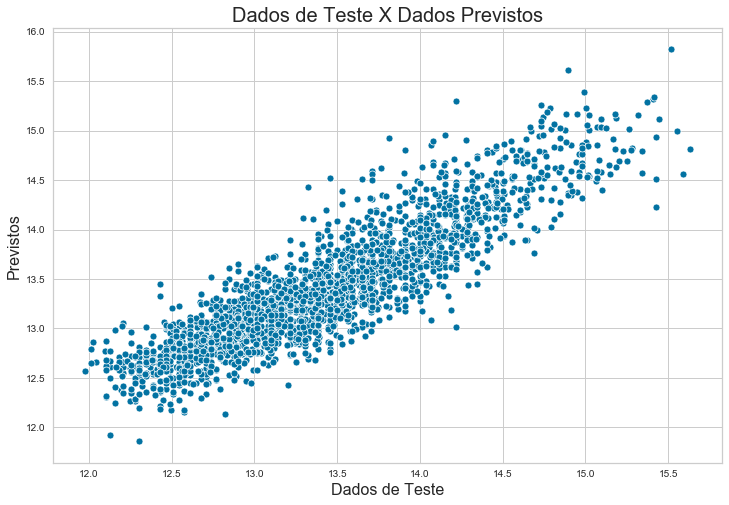

In [13]:
ax = sns.scatterplot(x=y_test, y=y_pred)
ax.figure.set_size_inches(12, 8)
ax.set_title('Dados de Teste X Dados Previstos', fontsize=20)
ax.set_ylabel('Previstos', fontsize=16)
ax.set_xlabel('Dados de Teste', fontsize=16)
ax

Text(0.5, 1.0, 'Densidade dos resíduos')

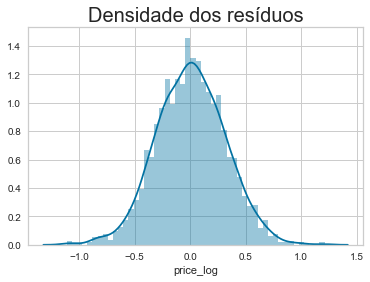

In [14]:
ax = sns.distplot((y_test-y_pred), bins=50)
ax.set_title('Densidade dos resíduos', fontsize=20)

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os erros devem estar bem proximos de zero em uma distribuição normal</p>

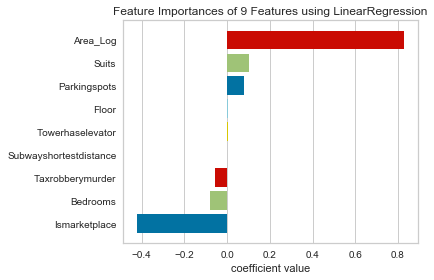

In [15]:
labels = list(map(lambda s: s.title(), x))
viz = FeatureImportances(LinearRegression(), labels=labels, relative=False)

viz.fit(x, y)
viz.show()

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
É possivel perceber através do gráfico que as features towerHasElevator, taxRobberyMurder, bedrooms e isMarketplace parecem não ser tão relevantes para o modelo LinearRegression.
</p>

## Ridge

In [16]:
modelo = Ridge()

modelo.fit(x_train, y_train)

y_pred = modelo.predict(x_test).round(2)

mae = metrics.mean_absolute_error(y_test, y_pred).round(4)
mse = metrics.mean_squared_error(y_test, y_pred).round(4)
r2 = metrics.r2_score(y_test, y_pred).round(4)
r2_adjusted = r2_adjusted_score(r2, y_test, x_test).round(4)
rmse = np.sqrt(mse).round(4)

modelo_metricas = modelo_metricas.append(pd.DataFrame([{'Modelo': 'Ridge', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2, 'R² Adjusted': r2_adjusted}]), ignore_index=True)

## Lasso

In [17]:
modelo = Lasso()

modelo.fit(x_train, y_train)

y_pred = modelo.predict(x_test).round(2)

mae = metrics.mean_absolute_error(y_test, y_pred).round(4)
mse = metrics.mean_squared_error(y_test, y_pred).round(4)
r2 = metrics.r2_score(y_test, y_pred).round(4)
r2_adjusted = r2_adjusted_score(r2, y_test, x_test).round(4)
rmse = np.sqrt(mse).round(4)

modelo_metricas = modelo_metricas.append(pd.DataFrame([{'Modelo': 'Lasso', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2, 'R² Adjusted': r2_adjusted}]), ignore_index=True)

## ElasticNet

In [18]:
modelo = ElasticNet()

modelo.fit(x_train, y_train)

y_pred = modelo.predict(x_test).round(2)

mae = metrics.mean_absolute_error(y_test, y_pred).round(4)
mse = metrics.mean_squared_error(y_test, y_pred).round(4)
r2 = metrics.r2_score(y_test, y_pred).round(4)
r2_adjusted = r2_adjusted_score(r2, y_test, x_test).round(4)
rmse = np.sqrt(mse).round(4)

modelo_metricas = modelo_metricas.append(pd.DataFrame([{'Modelo': 'ElasticNet', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2, 'R² Adjusted': r2_adjusted}]), ignore_index=True)

## KNeighborsRegressor

In [19]:
modelo = KNeighborsRegressor()

modelo.fit(x_train, y_train)

y_pred = modelo.predict(x_test).round(2)

mae = metrics.mean_absolute_error(y_test, y_pred).round(4)
mse = metrics.mean_squared_error(y_test, y_pred).round(4)
r2 = metrics.r2_score(y_test, y_pred).round(4)
r2_adjusted = r2_adjusted_score(r2, y_test, x_test).round(4)
rmse = np.sqrt(mse).round(4)

modelo_metricas = modelo_metricas.append(pd.DataFrame([{'Modelo': 'KNeighborsRegressor', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2, 'R² Adjusted': r2_adjusted}]), ignore_index=True)

## DecisionTreeRegressor

In [20]:
modelo = DecisionTreeRegressor()

modelo.fit(x_train, y_train)

y_pred = modelo.predict(x_test).round(2)

mae = metrics.mean_absolute_error(y_test, y_pred).round(4)
mse = metrics.mean_squared_error(y_test, y_pred).round(4)
r2 = metrics.r2_score(y_test, y_pred).round(4)
r2_adjusted = r2_adjusted_score(r2, y_test, x_test).round(4)
rmse = np.sqrt(mse).round(4)

modelo_metricas = modelo_metricas.append(pd.DataFrame([{'Modelo': 'DecisionTreeRegressor', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2, 'R² Adjusted': r2_adjusted}]), ignore_index=True)

## SVR

In [21]:
modelo = SVR()

modelo.fit(x_train, y_train)

y_pred = modelo.predict(x_test).round(2)

mae = metrics.mean_absolute_error(y_test, y_pred).round(4)
mse = metrics.mean_squared_error(y_test, y_pred).round(4)
r2 = metrics.r2_score(y_test, y_pred).round(4)
r2_adjusted = r2_adjusted_score(r2, y_test, x_test).round(4)
rmse = np.sqrt(mse).round(4)

modelo_metricas = modelo_metricas.append(pd.DataFrame([{'Modelo': 'SVR', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2, 'R² Adjusted': r2_adjusted}]), ignore_index=True)

## GradientBoostingRegressor

In [22]:
modelo = GradientBoostingRegressor()

modelo.fit(x_train, y_train)

y_pred = modelo.predict(x_test).round(2)

mae = metrics.mean_absolute_error(y_test, y_pred).round(4)
mse = metrics.mean_squared_error(y_test, y_pred).round(4)
r2 = metrics.r2_score(y_test, y_pred).round(4)
r2_adjusted = r2_adjusted_score(r2, y_test, x_test).round(4)
rmse = np.sqrt(mse).round(4)

modelo_metricas = modelo_metricas.append(pd.DataFrame([{'Modelo': 'GradientBoostingRegressor', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2, 'R² Adjusted': r2_adjusted}]), ignore_index=True)

## RandomForestRegressor

In [23]:
modelo = GradientBoostingRegressor()

modelo.fit(x_train, y_train)

y_pred = modelo.predict(x_test).round(2)

mae = metrics.mean_absolute_error(y_test, y_pred).round(4)
mse = metrics.mean_squared_error(y_test, y_pred).round(4)
r2 = metrics.r2_score(y_test, y_pred).round(4)
r2_adjusted = r2_adjusted_score(r2, y_test, x_test).round(4)
rmse = np.sqrt(mse).round(4)

modelo_metricas = modelo_metricas.append(pd.DataFrame([{'Modelo': 'RandomForestRegressor', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2, 'R² Adjusted': r2_adjusted}]), ignore_index=True)

## Analisando os resultados

In [24]:
modelo_metricas

,Modelo,MAE,MSE,RMSE,R²,R² Adjusted
0,LinearRegression,0.2457,0.0962,0.3102,0.7951,0.7944
1,Ridge,0.2457,0.0962,0.3102,0.7951,0.7944
2,Lasso,0.5358,0.4414,0.6644,0.0597,0.0565
3,ElasticNet,0.5358,0.4414,0.6644,0.0596,0.0564
4,KNeighborsRegressor,0.4728,0.3630,0.6025,0.2267,0.2241
5,DecisionTreeRegressor,0.3065,0.1675,0.4093,0.6432,0.6420
6,SVR,0.4486,0.3318,0.5760,0.2931,0.2907
7,GradientBoostingRegressor,0.2266,0.0823,0.2869,0.8247,0.8241
8,RandomForestRegressor,0.2266,0.0823,0.2869,0.8247,0.8241


## Verificando o comportamento dos erros para o modelo RandomForestRegressor

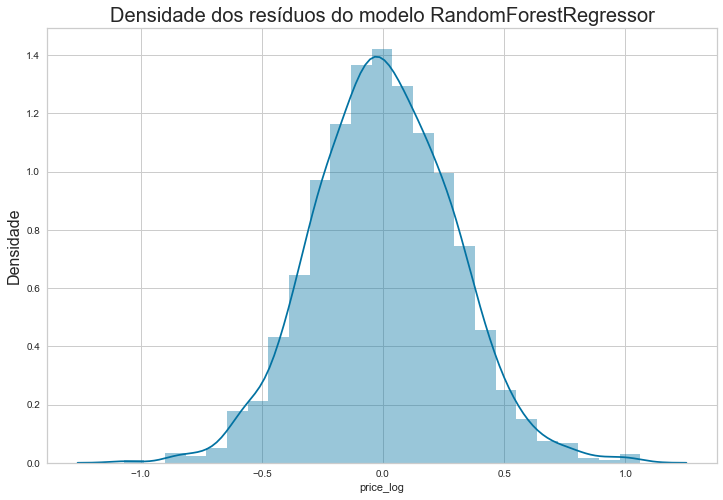

In [25]:
ax = sns.distplot((y_test-y_pred), bins=25)
ax.figure.set_size_inches(12, 8)
ax.set_title('Densidade dos resíduos do modelo RandomForestRegressor', fontsize=20)
ax.set_ylabel('Densidade', fontsize=16)
ax

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os erros devem estar bem proximos de zero em uma distribuição normal</p>

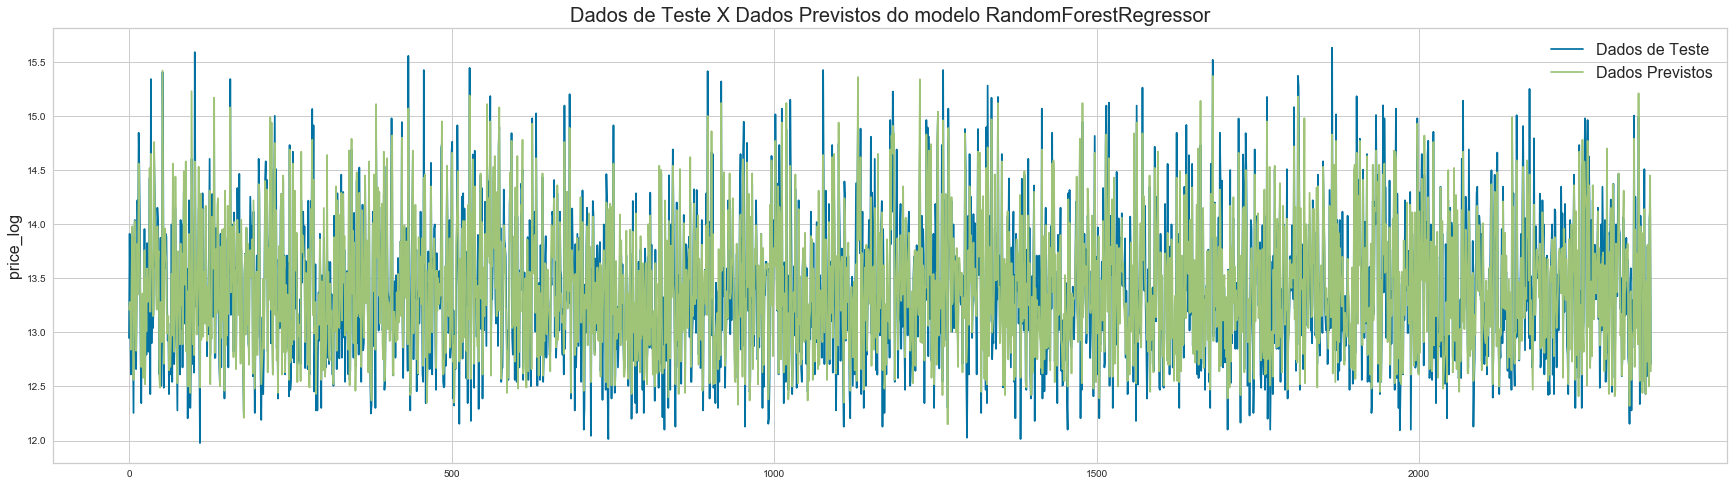

In [26]:
ax = sns.lineplot(x=np.arange(len(y_test)), y=y_test, label="Dados de Teste")
ax = sns.lineplot(x=np.arange(len(y_pred)), y=y_pred, label="Dados Previstos")
ax.figure.set_size_inches(30, 8)
ax.set_title('Dados de Teste X Dados Previstos do modelo RandomForestRegressor', fontsize=20)
ax.set_ylabel('price_log', fontsize=16)
ax.legend(prop={'size': 16})
ax

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
Observa-se que os dados previsão se ajustam bem aos dados de teste.</p>

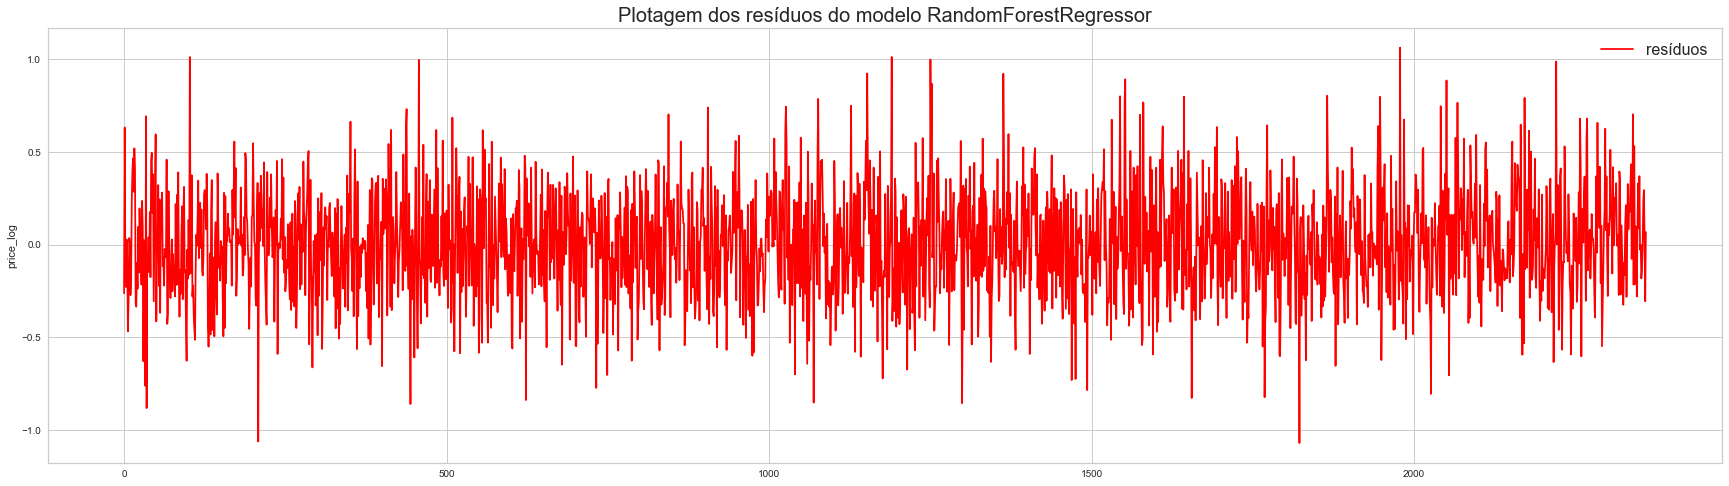

In [27]:
ax = sns.lineplot(x=np.arange(len(y_pred)), y=y_test-y_pred, color="red", label="resíduos")
ax.figure.set_size_inches(30, 8)
ax.set_title('Plotagem dos resíduos do modelo RandomForestRegressor', fontsize=20)
ax.legend(prop={'size': 16})
ax

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
nota-se que existem algumas amostrar que possuem uma diferença entre o valor previsto dos valores de teste maior do que as demais.</p>

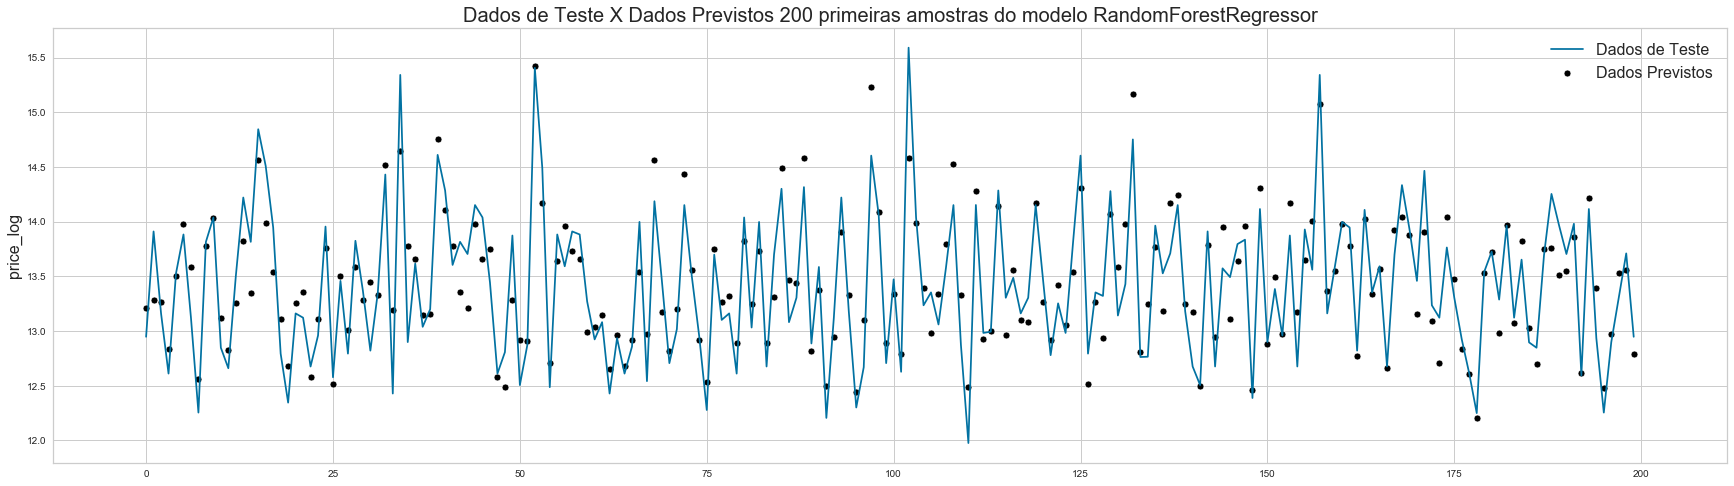

In [28]:
ax = sns.lineplot(x=np.arange(len(y_test[:200])), y=y_test[:200], label="Dados de Teste")
ax = sns.scatterplot(x=np.arange(len(y_pred[:200])), y=y_pred[:200], color='black', label="Dados Previstos")
ax.figure.set_size_inches(30, 8)
ax.set_title('Dados de Teste X Dados Previstos 200 primeiras amostras do modelo RandomForestRegressor', fontsize=20)
ax.set_ylabel('price_log', fontsize=16)
ax.legend(prop={'size': 16})
ax

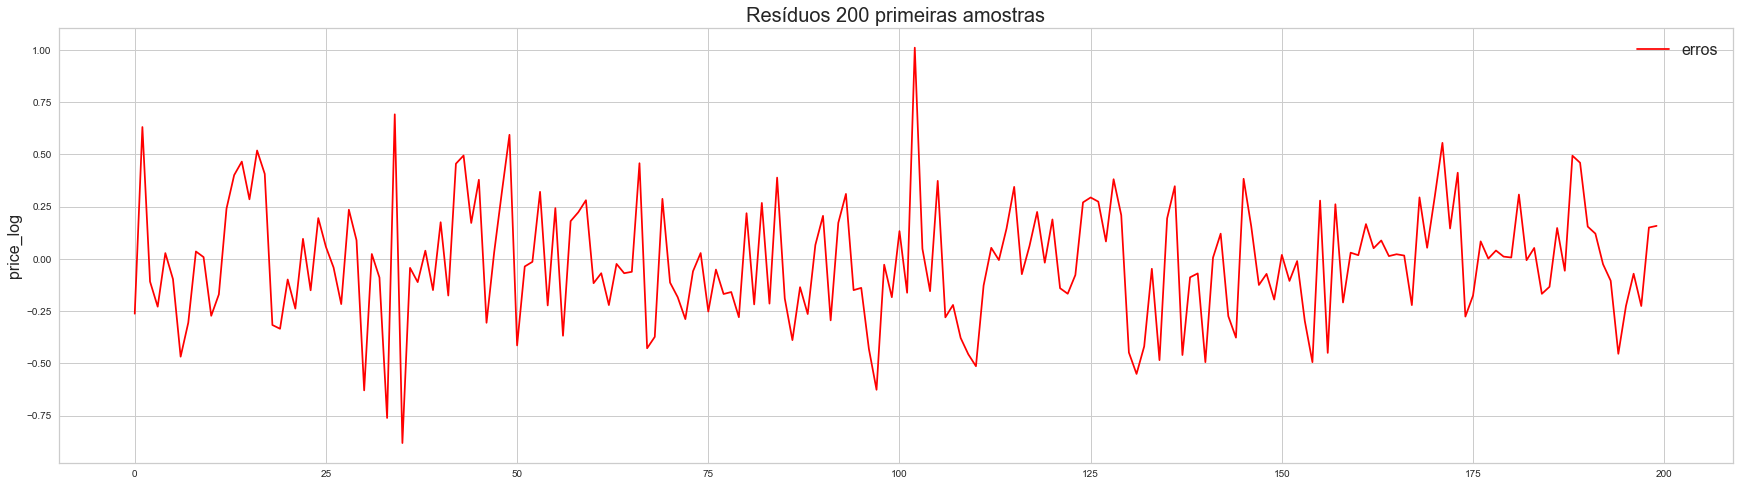

In [29]:
ax = sns.lineplot(x=np.arange(len(y_test[:200])), y=y_test[:200]-y_pred[:200], color='red', label="erros")
ax.figure.set_size_inches(30, 8)
ax.set_title('Resíduos 200 primeiras amostras', fontsize=20)
ax.set_ylabel('price_log', fontsize=16)
ax.legend(prop={'size': 16})
ax